In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# DATASET

In [59]:
nps_dataset = pd.read_csv('datasetNPS/1-s2.0-S2468170923000358-mmc1.csv', sep=',', header=0)
print(f'The dataset has {nps_dataset.shape[0]} instances and {nps_dataset.shape[1]} features.')
nps_dataset.head()

The dataset has 891 instances and 602 features.


,Name,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,label
0,1-Phenyl-2-(piperidin-1-yl)butan-1-one,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,"2,3-Dimethylethcathinone",0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,"2,4-Dimethylethcathinone",0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2-Chloroethcathinone,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,2-Ethylethcathinone,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [60]:
nps_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 602 entries, Name to label
dtypes: float64(579), int64(22), object(1)
memory usage: 4.1+ MB


In [61]:
nps_dataset.describe()

,1,2,3,4,5,6,7,8,9,10,...,592,593,594,595,596,597,598,599,600,label
count,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000034,0.000022,0.000011,0.000011,0.000034,0.000011,0.000011,0.000034,0.0,3.493827
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000580,0.000474,0.000335,0.000335,0.000580,0.000335,0.000335,0.000580,0.0,2.137077
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.0,6.000000


In [62]:
print(nps_dataset.isnull().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Length: 891, dtype: int64


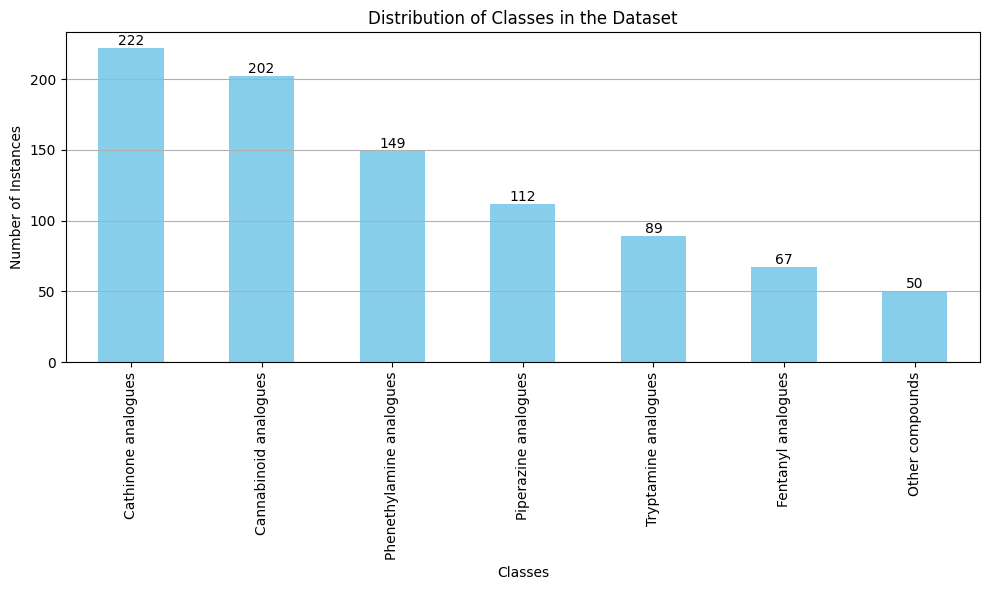

In [63]:
classes = ['Cathinone analogues', 'Cannabinoid analogues',
           'Phenethylamine analogues', 'Piperazine analogues',
           'Tryptamine analogues', 'Fentanyl analogues', 'Other compounds']

distributions = nps_dataset['label'].value_counts()

legends = {
  0: 'Cathinone analogues',
  1: 'Cannabinoid analogues',
  2: 'Phenethylamine analogues',
  3: 'Piperazine analogues',
  4: 'Tryptamine analogues',
  5: 'Fentanyl analogues',
  6: 'Other compounds'
}

plt.figure(figsize=(10, 6))
ax = distributions.plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.xticks(ticks=range(len(classes)), labels=[legends[i] for i in range(len(classes))], rotation=90)
plt.grid(axis='y')
plt.tight_layout()

for p in ax.patches:
  ax.annotate(str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', va='bottom', fontsize=10)

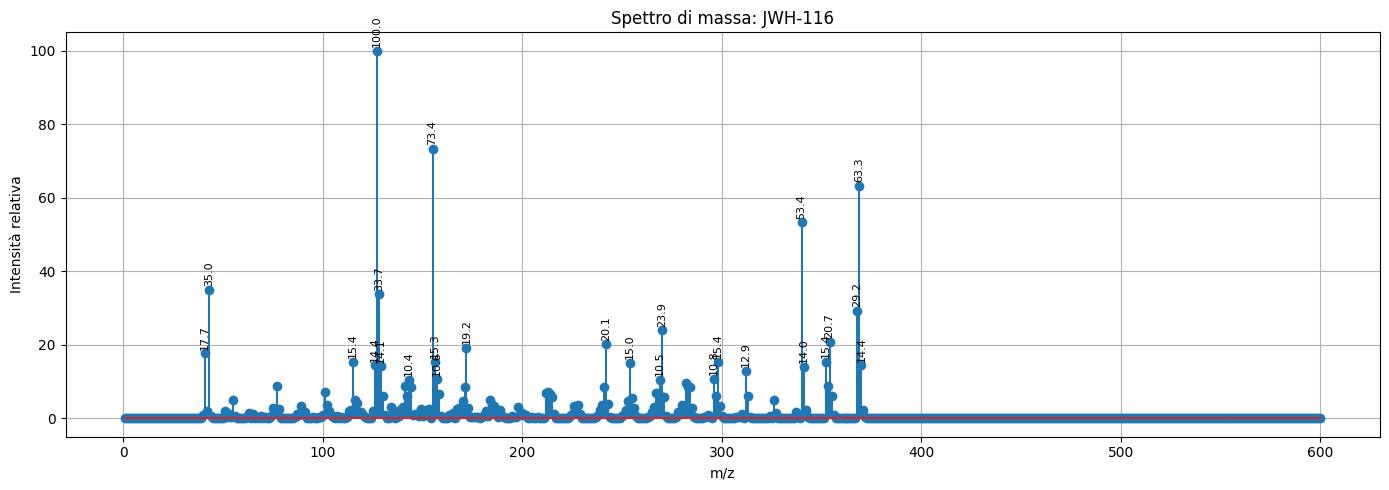

In [64]:
# Nello spettrometro di massa, il segnale sotto m/z 40 è spesso rumore o non rilevante per droghe sintetiche o 
# sostanze organiche complesse. 
#nps_dataset = nps_dataset.drop(columns=nps_dataset.columns[1:41])
#print(f'The dataset has {nps_dataset.shape[0]} instances and {nps_dataset.shape[1]} features after removing noise columns.')

# === spettro di massa ===
nome = "JWH-116"
riga = nps_dataset[nps_dataset.iloc[:, 0] == nome].iloc[0]

spettro = riga[1:-1].astype(float).values 
mz = list(range(1, 601))

# Plot con etichette
plt.figure(figsize=(14, 5))
(markerline, stemlines, baseline) = plt.stem(mz, spettro)
plt.xlabel("m/z")
plt.ylabel("Intensità relativa")
plt.title(f"Spettro di massa: {nome}")
plt.grid(True)

soglia = 10.0
for mzi, intensita in zip(mz, spettro):
    if intensita > soglia:
        plt.text(mzi, intensita + 1, f"{intensita:.1f}", ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

# DATA AUGMENTATION

To increase the robustness of the training and compensate
for the limited number of data points, data augmentation was
applied. The abundance values were increased by random
value in the range 0.01 to 9.99%. Such an augmentation
changes the absolute values of m/z intensities without changing
their proportion, i.e. the pattern. This augmentation step was
repeated to obtain four additional data points for each segment

In [65]:
def augment_spectrum(spettro, moltiplicatore=10, percentuale_variabile=0.1):
    augmented = []

    for _ in range(moltiplicatore):
        # Applica variazione casuale ±10%
        variazione = 1 + np.random.uniform(-percentuale_variabile, percentuale_variabile, size=len(spettro))
        spettro_variato = spettro * variazione

        # Rinormalizza: picco massimo = 100
        spettro_normalizzato = spettro_variato / spettro_variato.max() * 100
        augmented.append(spettro_normalizzato)

    return augmented

righe_augmented = []

print(nps_dataset.shape)
print(nps_dataset[1:-1].shape)


for idx, row in nps_dataset.iterrows():
    nome = row["Name"]
    categoria = row["label"]
    spettro = row[1:-1].astype(float).values  # valori m/z 

    # Genera 10 spettrogrammi aumentati
    augmented = augment_spectrum(spettro, moltiplicatore=10)

    for spettro_aug in augmented:
        nuova_riga = [nome] + list(spettro_aug) + [categoria]
        righe_augmented.append(nuova_riga)

# Crea nuovo DataFrame aumentato
colonne = ["Name"] + list(range(1, 601)) + ["label"]
df_augmented = pd.DataFrame(righe_augmented, columns=colonne)
print(f'The augmented dataset has {df_augmented.shape[0]} instances and {df_augmented.shape[1]} features.')
df_augmented


(891, 602)
(889, 602)
The augmented dataset has 8910 instances and 602 features.


,Name,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,label
0,1-Phenyl-2-(piperidin-1-yl)butan-1-one,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1-Phenyl-2-(piperidin-1-yl)butan-1-one,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1-Phenyl-2-(piperidin-1-yl)butan-1-one,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1-Phenyl-2-(piperidin-1-yl)butan-1-one,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1-Phenyl-2-(piperidin-1-yl)butan-1-one,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,Digitoxin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
8906,Digitoxin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
8907,Digitoxin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
8908,Digitoxin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


# FEATURE ENGINEERING

Base Peak Mass: Mass-to-charge ratio (m/z) of the peak with the greatest intensity (i.e., “base peak”) 

Base Peak Mass Proximity: m/z difference between base peak and the peak with the nearest m/z value 

Maximum Mass: m/z of the peak with the greatest mass 

Maximum Mass Proximity: m/z difference between maximum-mass peak and the peak with the nearest m/z value 

Number of Peaks: Total number of reported peaks in the spectrum 

Intensity Mean: Mean of all peaks’ intensity values 

Intensity Standard Deviation Standard: deviation of all peaks’ intensity values 

Intensity Density: Maximum intensity divided by number of peaks 
Mass Mean: Mean of all peaks’ m/z 
Mass Standard Deviation: Standard deviation of all peaks’ m/z Mass Density; Maximum mass divided by number of peaks 
Most Frequent Pair Peakwise Mass Difference (PPMD): Most frequent m/z difference among all pairs of peaks 

Mean PPMD: Mean of m/z differences among all pairs of peaks 

In [66]:
import numpy as np

mz_range = np.arange(1, 601)
spectra = nps_dataset[mz_range.astype(str)].values

def compute_features(spectrum):
    peaks = [(mz, intensity) for mz, intensity in zip(mz_range, spectrum) if intensity > 0]
    if not peaks:
        return [np.nan] * 13

    mz_values, intensities = zip(*peaks)
    mz_values = np.array(mz_values)
    intensities = np.array(intensities)

    # Base Peak Mass
    base_peak_idx = np.argmax(intensities)
    base_peak_mass = mz_values[base_peak_idx]
    
    # Base Peak Proximity
    if len(mz_values) > 1:
        mz_diff_base = np.abs(mz_values - base_peak_mass)
        base_prox = np.partition(mz_diff_base[mz_diff_base != 0], 0)[0]
    else:
        base_prox = 0.0

    # Maximum Mass
    max_mass = np.max(mz_values)

    # Maximum Mass Proximity
    if len(mz_values) > 1:
        mz_diff_max = np.abs(mz_values - max_mass)
        max_prox = np.partition(mz_diff_max[mz_diff_max != 0], 0)[0]
    else:
        max_prox = 0.0

    # Number of Peaks
    num_peaks = len(peaks)

    # Intensity stats
    intensity_mean = np.mean(intensities)
    intensity_std = np.std(intensities)
    intensity_density = np.max(intensities) / num_peaks

    # Mass stats
    mass_mean = np.mean(mz_values)
    mass_std = np.std(mz_values)
    mass_density = max_mass / num_peaks

    # Pairwise Peak Mass Differences
    diffs = np.abs(np.subtract.outer(mz_values, mz_values))
    diffs = diffs[np.triu_indices(len(diffs), k=1)]
    diff_counts = np.bincount(np.round(diffs).astype(int))
    ppmd = np.argmax(diff_counts)
    mean_ppmd = np.mean(diffs)

    return [
        base_peak_mass, base_prox, max_mass, max_prox,
        num_peaks, intensity_mean, intensity_std, intensity_density,
        mass_mean, mass_std, mass_density, ppmd, mean_ppmd
    ]

features = np.array([compute_features(spectrum) for spectrum in spectra])

feature_columns = [
    "BasePeakMass", "BasePeakMassProximity", "MaxMass", "MaxMassProximity",
    "NumPeaks", "IntensityMean", "IntensityStd", "IntensityDensity",
    "MassMean", "MassStd", "MassDensity", "PPMD", "MeanPPMD"
]

features_df = pd.DataFrame(features, columns=feature_columns)
full_df = pd.concat([nps_dataset[["Name", "label"]], features_df], axis=1)
full_df.head()


,Name,label,BasePeakMass,BasePeakMassProximity,MaxMass,MaxMassProximity,NumPeaks,IntensityMean,IntensityStd,IntensityDensity,MassMean,MassStd,MassDensity,PPMD,MeanPPMD
0,1-Phenyl-2-(piperidin-1-yl)butan-1-one,0,126.0,1.0,231.0,1.0,45.0,4.029333,14.658635,2.222000,100.711111,51.082340,5.133333,2.0,56.096970
1,"2,3-Dimethylethcathinone",0,72.0,1.0,203.0,2.0,76.0,2.470000,11.462612,1.315658,109.434211,45.573924,2.671053,1.0,52.997544
2,"2,4-Dimethylethcathinone",0,72.0,1.0,201.0,11.0,74.0,2.632703,11.673796,1.351216,103.824324,43.166666,2.716216,1.0,49.862643
3,2-Chloroethcathinone,0,72.0,1.0,196.0,21.0,79.0,2.506709,11.389502,1.265696,101.379747,40.143510,2.481013,1.0,46.492697
4,2-Ethylethcathinone,0,72.0,1.0,174.0,2.0,65.0,2.801846,12.453542,1.538308,96.184615,37.912406,2.676923,1.0,44.025962


# ANALISI ESPLORATIVA

In [67]:
full_df.corr

<bound method DataFrame.corr of                                        Name  label  BasePeakMass  \
0    1-Phenyl-2-(piperidin-1-yl)butan-1-one      0         126.0   
1                  2,3-Dimethylethcathinone      0          72.0   
2                  2,4-Dimethylethcathinone      0          72.0   
3                      2-Chloroethcathinone      0          72.0   
4                       2-Ethylethcathinone      0          72.0   
..                                      ...    ...           ...   
886                  Testosterone enanthate      6         124.0   
887                          Beclomethasone      6         121.0   
888                                Squalane      6          57.0   
889                                  Kepone      6         272.0   
890                               Digitoxin      6          43.0   

     BasePeakMassProximity  MaxMass  MaxMassProximity  NumPeaks  \
0                      1.0    231.0               1.0      45.0   
1                

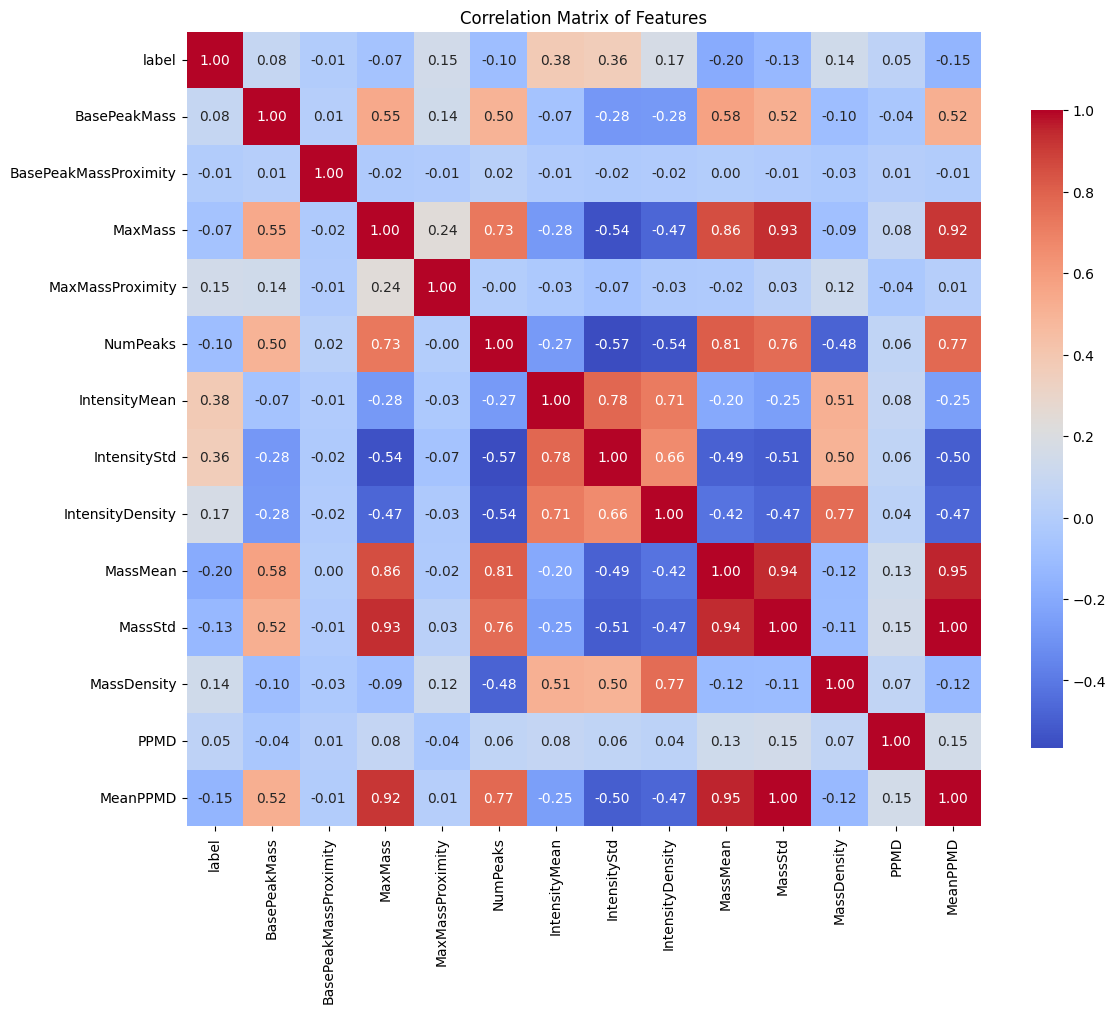

In [68]:
import seaborn as sns
full_df.drop(columns=['Name'], inplace=True)
plt.figure(figsize=(12, 10))
sns.heatmap(full_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()


In [69]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = full_df.drop(columns=['label'])
y = full_df['label']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.80
to_drop = set()

for col in upper.columns:
    correlated_features = upper.index[upper[col] > threshold].tolist()
    for corr_feat in correlated_features:
        if importances[col] < importances[corr_feat]:
            to_drop.add(col)
        else:
            to_drop.add(corr_feat)

print(f"Variabili rimosse tenendo conto di importanza e correlazione (> {threshold}):", to_drop)

full_df= full_df.drop(columns=list(to_drop))

feature_columns= full_df.drop(columns=['label']).columns.tolist()
full_df.head()

Variabili rimosse tenendo conto di importanza e correlazione (> 0.8): {'MeanPPMD', 'MassStd', 'NumPeaks', 'MaxMass'}


,label,BasePeakMass,BasePeakMassProximity,MaxMassProximity,IntensityMean,IntensityStd,IntensityDensity,MassMean,MassDensity,PPMD
0,0,126.0,1.0,1.0,4.029333,14.658635,2.222000,100.711111,5.133333,2.0
1,0,72.0,1.0,2.0,2.470000,11.462612,1.315658,109.434211,2.671053,1.0
2,0,72.0,1.0,11.0,2.632703,11.673796,1.351216,103.824324,2.716216,1.0
3,0,72.0,1.0,21.0,2.506709,11.389502,1.265696,101.379747,2.481013,1.0
4,0,72.0,1.0,2.0,2.801846,12.453542,1.538308,96.184615,2.676923,1.0


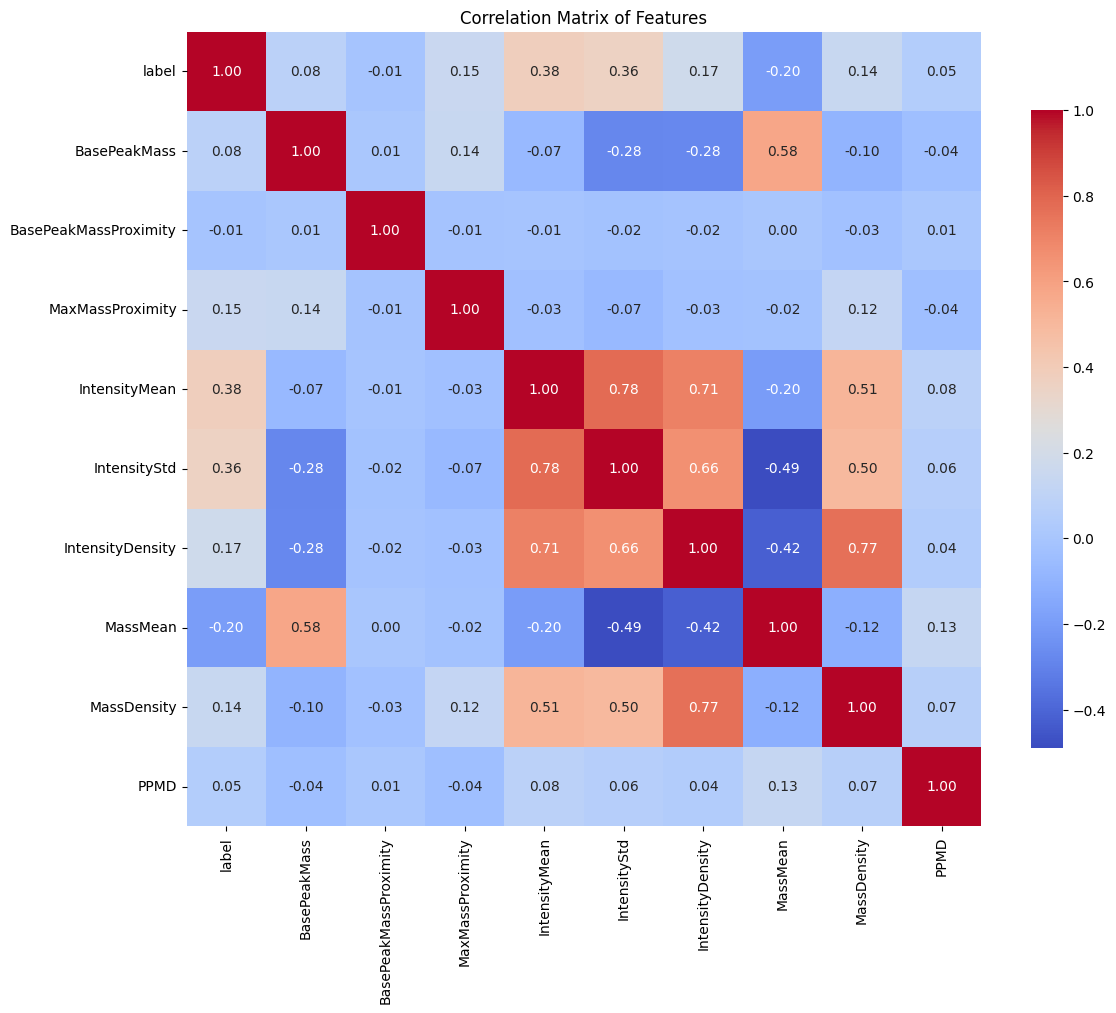

In [70]:
plt.figure(figsize=(12, 10))
sns.heatmap(full_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()


Perché funziona meglio?
Si preservano le feature più rilevanti per il modello.

Si evita di rimuovere a caso variabili potenzialmente importanti.

La soglia può essere adattata per bilanciare riduzione dimensionalità e perdita d’informazione.



# MODELLING


In [71]:
import pandas as pd
import numpy as np
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# === 1. Caricamento e preparazione dei dati ===
df = full_df.copy()  

Y = df['label']
X = df.drop(['label'], axis=1)

X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f'The training set has {x_train.shape[0]} instances and {x_train.shape[1]} features.')
print(f'The test set has {x_test.shape[0]} instances and {x_test.shape[1]} features.')

# oversampling
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print(pd.Series(y_train).value_counts())


(891, 9) (891,)
The training set has 712 instances and 9 features.
The test set has 179 instances and 9 features.
0    177
2    177
5    177
6    177
4    177
1    177
3    177
Name: count, dtype: int64


=== Classification Report ===
                          precision    recall  f1-score   support

     Cathinone analogues       0.63      0.67      0.65        18
   Cannabinoid analogues       0.90      0.87      0.88        30
Phenethylamine analogues       0.48      0.45      0.47        22
    Piperazine analogues       0.56      0.90      0.69        10
    Tryptamine analogues       0.54      0.54      0.54        13
      Fentanyl analogues       0.85      0.89      0.87        45
         Other compounds       0.85      0.71      0.77        41

                accuracy                           0.74       179
               macro avg       0.69      0.72      0.70       179
            weighted avg       0.75      0.74      0.74       179


=== Confusion Matrix ===


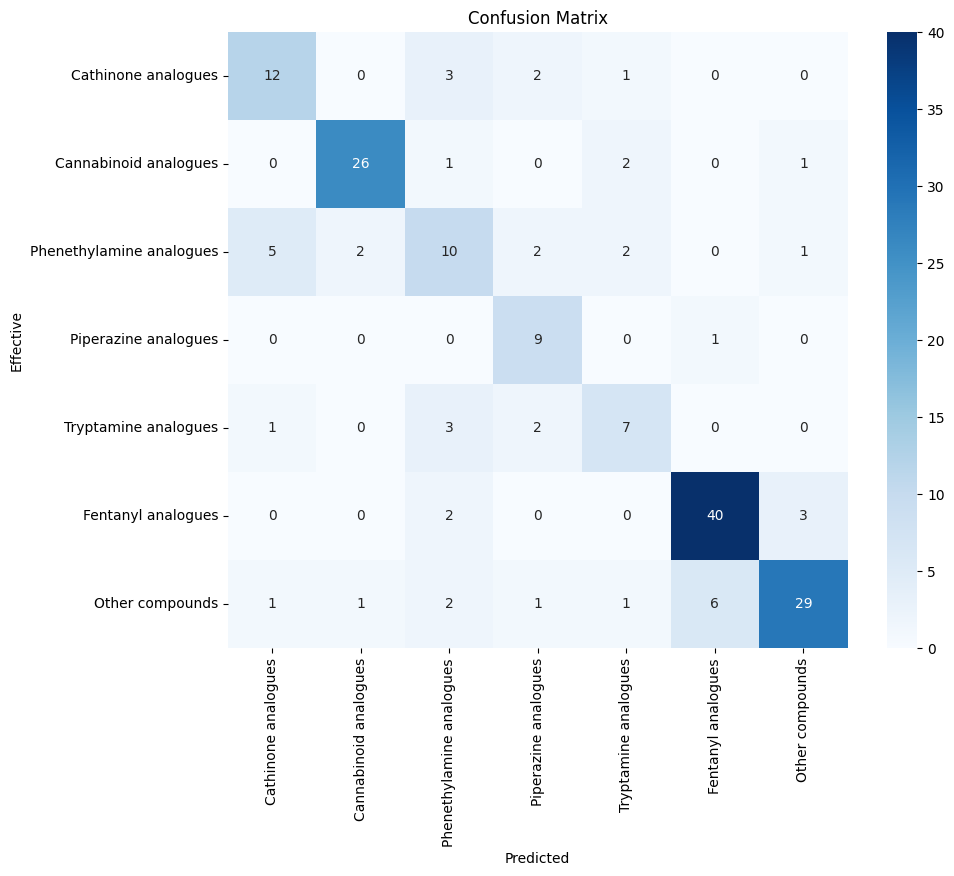


Cross-validation accuracy (4-fold): 0.87 ± 0.05


In [72]:
import seaborn as sns

# === 4. Classificatore Balanced Random Forest ===
clf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

# === 5. Valutazione ===
y_pred = clf.predict(x_test)
print("=== Classification Report ===")
class_labels = [legends[i] for i in clf.classes_]
print(classification_report(y_test, y_pred, target_names=class_labels))
print("\n=== Confusion Matrix ===")
confusion_matrix_result = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Effective')
plt.grid(False)
plt.show()    

# === 6. Cross-validation score ===
scores = cross_val_score(clf, x_train, y_train, cv=4)
print(f"\nCross-validation accuracy (4-fold): {scores.mean():.2f} ± {scores.std():.2f}")

In [73]:
import joblib

In [74]:
joblib.dump(clf, 'model/balanced_random_forest_brf.pkl')

['model/balanced_random_forest_brf.pkl']

C:\Users\claud\AppData\Local\Temp\ipykernel_2444\3071217963.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


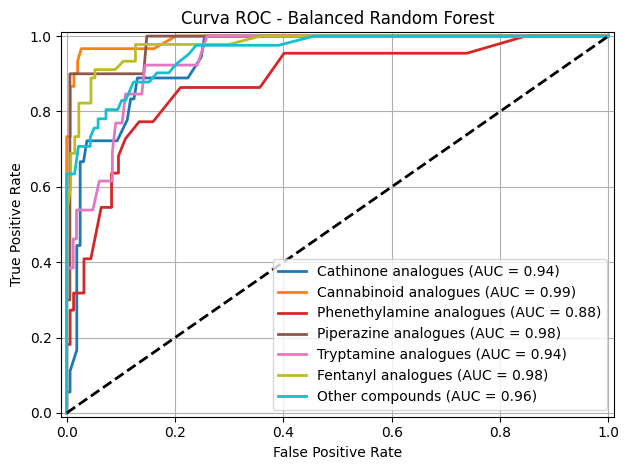

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# === Binarizza le etichette (necessario per multi-classe) ===
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = clf.predict_proba(x_test)

# === Curva ROC (multi-classe One-vs-Rest) ===
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f"{class_labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Balanced Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


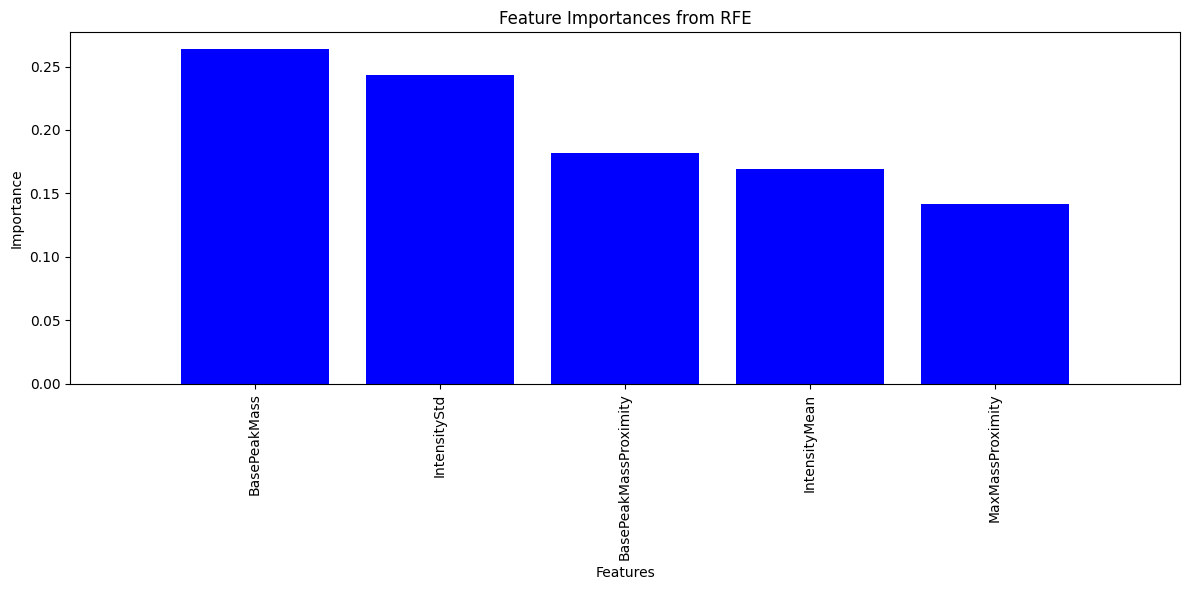

In [76]:
#feature importance
from sklearn.feature_selection import RFE
rfe_base_clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rfe = RFE(rfe_base_clf, n_features_to_select=5, verbose=1)
clf_rfe.fit(x_train, y_train)

importances = clf_rfe.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot delle feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances from RFE")
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), [feature_columns[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Feature selezionate: ['BasePeakMass' 'IntensityMean' 'IntensityStd' 'IntensityDensity'
 'MassMean']
=== Classification Report after RFE ===
                          precision    recall  f1-score   support

     Cathinone analogues       0.52      0.67      0.59        18
   Cannabinoid analogues       0.90      0.93      0.92        30
Phenethylamine analogues       0.53      0.36      0.43        22
    Piperazine analogues       0.57      0.80      0.67        10
    Tryptamine analogues       0.47      0.54      0.50        13
      Fentanyl analogues       0.81      0.87      0.84        45
         Other compounds       0.88      0.71      0.78        41

                accuracy                           0.73       179
               macro avg       0.67      0.70      0.67       179
            weighted avg       0.74      0.73      0.73       179



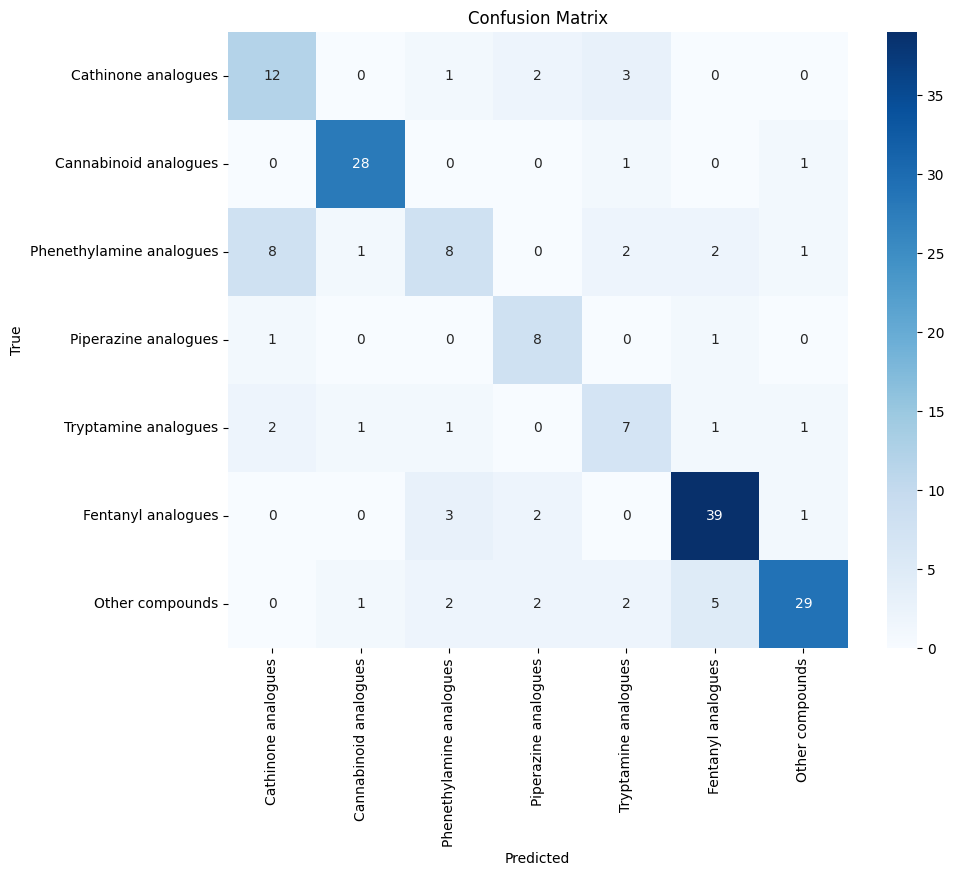


Cross-validation accuracy (4-fold) after RFE: 0.84 ± 0.02


In [77]:
# Selezione boolean array delle feature scelte da RFE
selected_indices = clf_rfe.support_

selected_features = np.array(feature_columns)[selected_indices]
print("Feature selezionate:", selected_features)

if isinstance(x_train, pd.DataFrame):
    X_train_selected = x_train.loc[:, selected_features].values
    X_test_selected = x_test.loc[:, selected_features].values
else:
    # Assumiamo numpy array
    X_train_selected = x_train[:, selected_indices]
    X_test_selected = x_test[:, selected_indices]

# Inizializzo il classificatore Balanced Random Forest
bdt_clf_rfe = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
bdt_clf_rfe.fit(X_train_selected, y_train)

# Predizione sul test set
y_pred_rfe = bdt_clf_rfe.predict(X_test_selected)

# Report delle performance
print("=== Classification Report after RFE ===")
print(classification_report(y_test, y_pred_rfe, target_names=class_labels))

# Matrice di confusione 
confusion_matrix_result = confusion_matrix(y_test, y_pred_rfe)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.grid(False)
plt.show()

from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
scores = cross_val_score(bdt_clf_rfe, X_train_selected, y_train, cv=cv)

print(f"\nCross-validation accuracy (4-fold) after RFE: {scores.mean():.2f} ± {scores.std():.2f}")


In [90]:
joblib.dump(bdt_clf_rfe, 'model/balanced_random_forest_rfe.pkl')

['model/balanced_random_forest_rfe.pkl']

C:\Users\claud\AppData\Local\Temp\ipykernel_2444\132180198.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


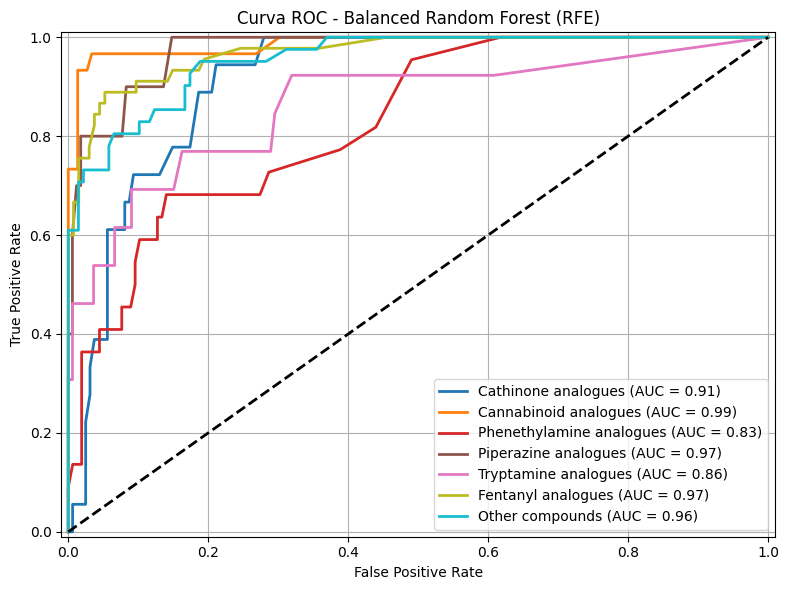

In [78]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizza le etichette
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)
y_score_rfe = bdt_clf_rfe.predict_proba(X_test_selected)

# Calcola fpr, tpr, auc per ogni classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rfe[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f"{class_labels[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Balanced Random Forest (RFE)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Best parameters found:  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
Best cross-validation score:  0.9577084743688303

=== Classification Report (Best Model) ===
                          precision    recall  f1-score   support

     Cathinone analogues       0.94      0.89      0.92        19
   Cannabinoid analogues       0.89      0.89      0.89        27
Phenethylamine analogues       0.93      0.93      0.93        29
    Piperazine analogues       1.00      0.87      0.93        15
    Tryptamine analogues       1.00      1.00      1.00         9
      Fentanyl analogues       0.96      1.00      0.98        43
         Other compounds       0.84      0.86      0.85        37

                accuracy                           0.92       179
               macro avg       0.94      0.92      0.93       179
            weighted avg       0.92      0.92      0.92       179


=== Confusion Matrix (Best Model) ===


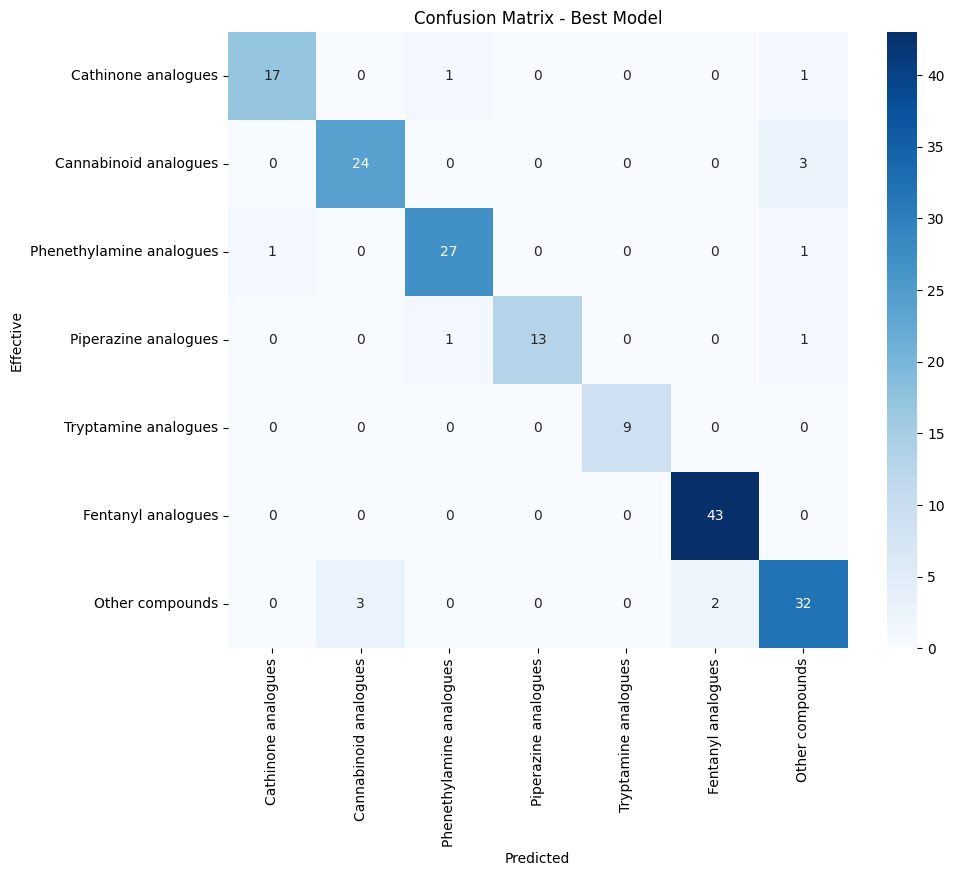


=== Cross-validation score (Best Model) ===
Cross-validation accuracy (4-fold): 0.77 ± 0.06


In [92]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# === 7. Hyperparameters Tuning ===
param_distributions = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=bdt_clf_rfe,
    param_distributions=param_distributions,
    n_iter=20, 
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)

# Risultati
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Valutazione del modello ottimizzato
best_clf = random_search.best_estimator_
y_pred_best = best_clf.predict(x_test)

print("\n=== Classification Report (Best Model) ===")
print(classification_report(y_test, y_pred_best, target_names=class_labels))

print("\n=== Confusion Matrix (Best Model) ===")

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('Effective')
plt.grid(False)
plt.show()

print("\n=== Cross-validation score (Best Model) ===")
scores_best = cross_val_score(best_clf, x_test, y_test, cv=4)
print(f"Cross-validation accuracy (4-fold): {scores_best.mean():.2f} ± {scores_best.std():.2f}")



=== Albero di decisione ===


IndexError: list index out of range

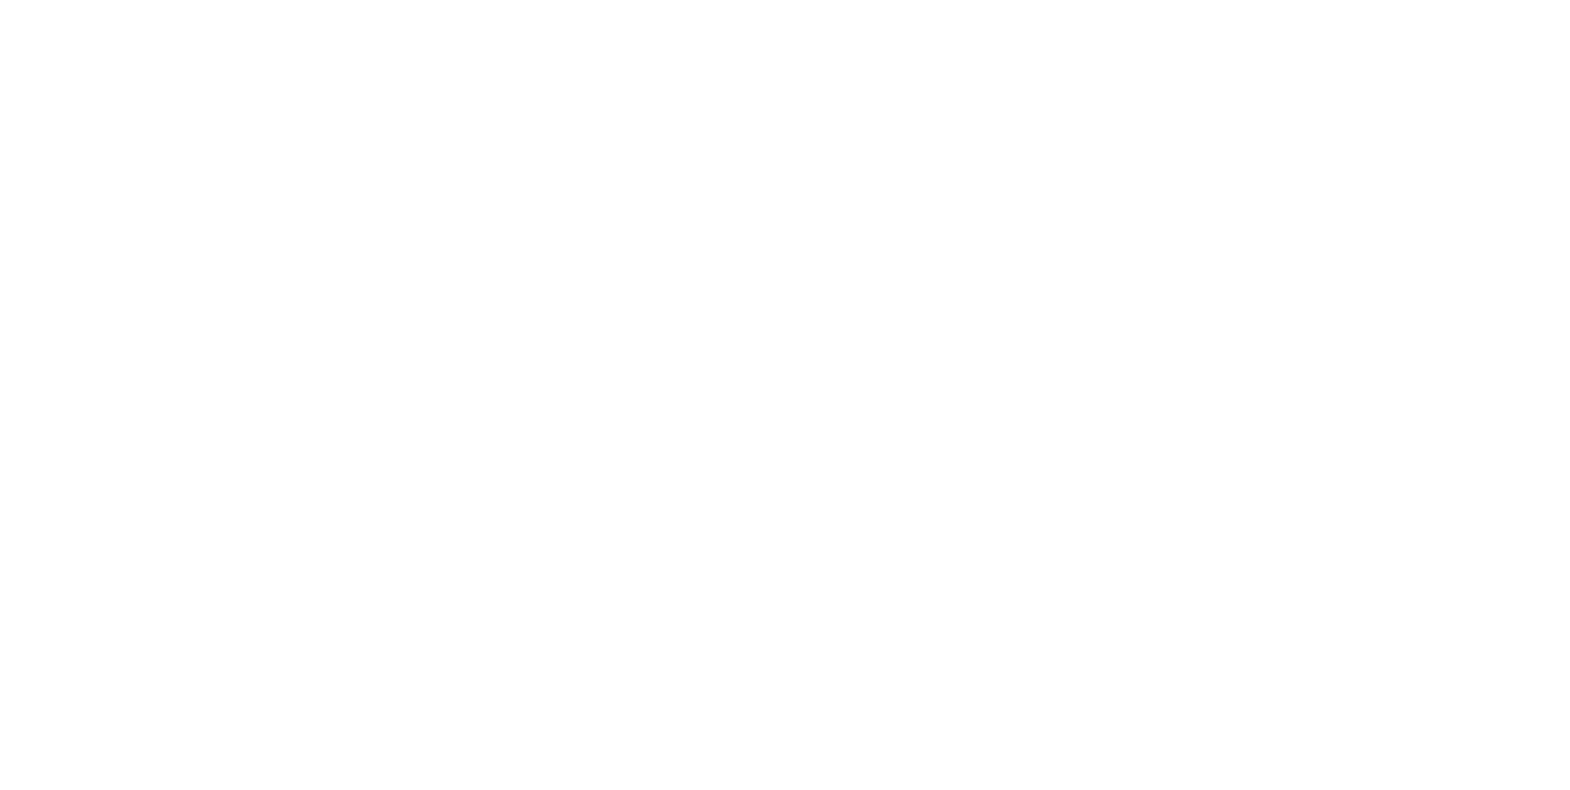

In [95]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# === 1. Stampa di un singolo albero ===
print("\n=== Albero di decisione ===")

# Plot del primo albero della foresta
plt.figure(figsize=(20, 10))
plot_tree(
    best_clf.estimators_[0],
    feature_names=feature_columns,
    class_names=[legends[i] for i in best_clf.classes_],
    filled=True,
    rounded=True,
)
plt.title("Visualizzazione di un albero nel Balanced Random Forest")
plt.tight_layout()
plt.show()

# === 2. Metriche strutturali degli alberi ===
print("\n=== Metriche medie degli alberi ===")
metrics = {
    'n_nodes': [est.tree_.node_count for est in best_clf.estimators_],
    'max_depth': [est.tree_.max_depth for est in best_clf.estimators_]
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df.mean())

# === 3. Visualizzazione delle metriche medie ===
metrics_df.mean().plot(kind='bar', figsize=(8, 5), color='teal')
plt.title('Metriche medie degli alberi - Balanced Random Forest')
plt.ylabel('Valore medio')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\claud\AppData\Local\Temp\ipykernel_2444\2004994584.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


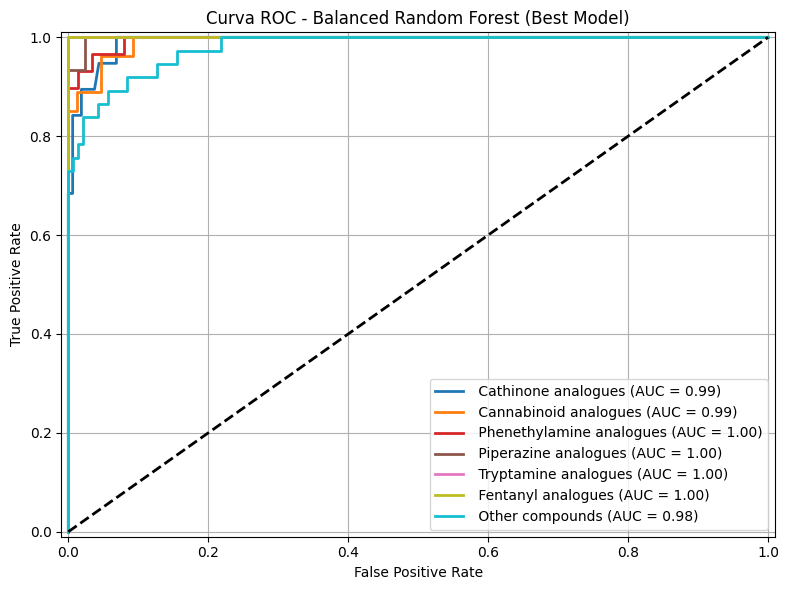

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# === Preparazione (binarizzazione classi) ===
classes = np.unique(y_test)
n_classes = len(classes)

# Binarizza le etichette per multi-classe
y_test_bin = label_binarize(y_test, classes=classes)
y_score = best_clf.predict_proba(x_test)

# === ROC Curve per ogni classe ===
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# === Plot della curva ROC ===
plt.figure(figsize=(8, 6))
# ROC per ciascuna classe
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f" {class_labels[i]} (AUC = {roc_auc[i]:.2f})")

# Linea di riferimento
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Balanced Random Forest (Best Model)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [97]:
# salvataggio del modello
joblib.dump(best_clf, 'model/balanced_random_forest_brf_hmp.pkl')

['model/balanced_random_forest_brf_hmp.pkl']

In [83]:
spectrum_dataset= nps_dataset.copy().drop(columns=['Name'])
print(f'The spectrum dataset has {spectrum_dataset.shape[0]} instances and {spectrum_dataset.shape[1]} features.')
spectrum_dataset.head()

The spectrum dataset has 891 instances and 601 features.


,1,2,3,4,5,6,7,8,9,10,...,592,593,594,595,596,597,598,599,600,label
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Model: "dnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         9,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           217 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,547 (740.42 KB)

 Trainable params: 189,547 (740.42 KB)

 Non-trainable params: 0 (0.00 B)

None


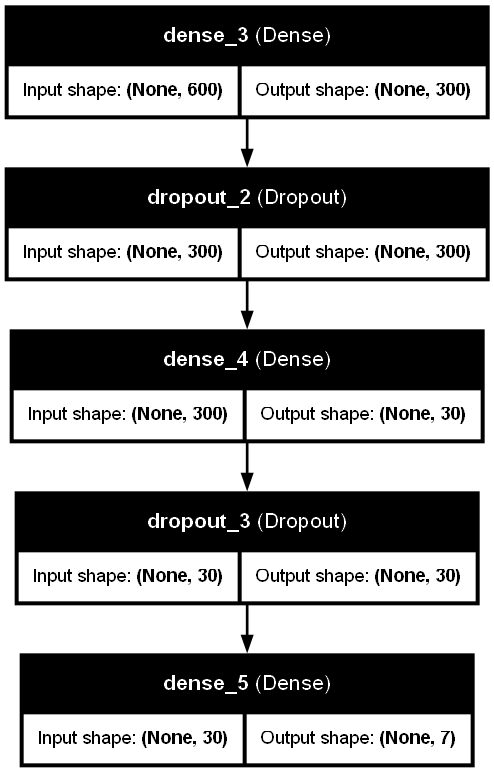

In [84]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import graphviz

model = keras.Sequential(name = 'dnn')
model.add(keras.Input(shape=(600,)))
model.add(layers.Dense(300, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(30, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7, activation = 'softmax'))

from tensorflow.keras.utils import plot_model
print(model.summary())

# Salva il modello come immagine
plot_model(model, to_file="dnn_model_structure.png", show_shapes=True, show_layer_names=True, dpi=96,)

In [85]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'],
)

Y = spectrum_dataset['label']
X = spectrum_dataset.drop(['label'], axis=1)

X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'The training set has {x_train.shape[0]} instances and {x_train.shape[1]} features.')
print(f'The test set has {x_test.shape[0]} instances and {x_test.shape[1]} features.')

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(pd.Series(y_train).value_counts())

# oversampling
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print(pd.Series(y_train).value_counts())

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=5,            
    restore_best_weights=True 
)

history= model.fit(
    x_train, y_train,  
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop] 
)

(891, 600) (891,)
The training set has 712 instances and 600 features.
The test set has 179 instances and 600 features.
5    179
6    165
1    122
2     83
0     70
4     58
3     35
Name: count, dtype: int64
3    179
6    179
4    179
1    179
5    179
0    179
2    179
Name: count, dtype: int64
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3530 - loss: 1.7682 - val_accuracy: 0.0677 - val_loss: 2.2448
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7025 - loss: 0.9266 - val_accuracy: 0.5020 - val_loss: 1.2582
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8085 - loss: 0.6100 - val_accuracy: 0.8327 - val_loss: 0.6905
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8933 - loss: 0.4061 - val_accuracy: 0.8725 - val_loss: 0.4356
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9296 - loss: 0.2591 - val_accuracy: 0.9920 - val_loss: 0.2471
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9273 - 

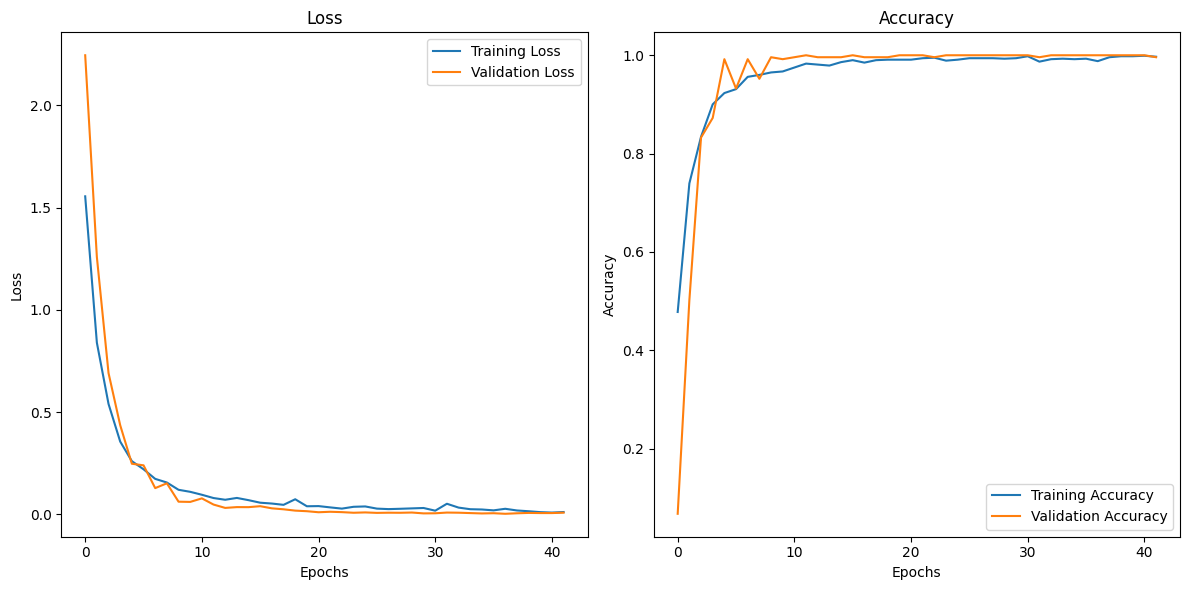

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
=== Classification Report ===
                          precision    recall  f1-score   support

     Cathinone analogues       0.72      0.68      0.70        19
   Cannabinoid analogues       0.91      0.78      0.84        27
Phenethylamine analogues       0.86      0.86      0.86        29
    Piperazine analogues       0.80      0.80      0.80        15
    Tryptamine analogues       0.60      1.00      0.75         9
      Fentanyl analogues       0.93      0.91      0.92        43
         Other compounds       0.70      0.70      0.70        37

                accuracy                           0.81       179
               macro avg       0.79      0.82      0.80       179
            weighted avg       0.82      0.81      0.81       179


=== Confusion Matrix ===


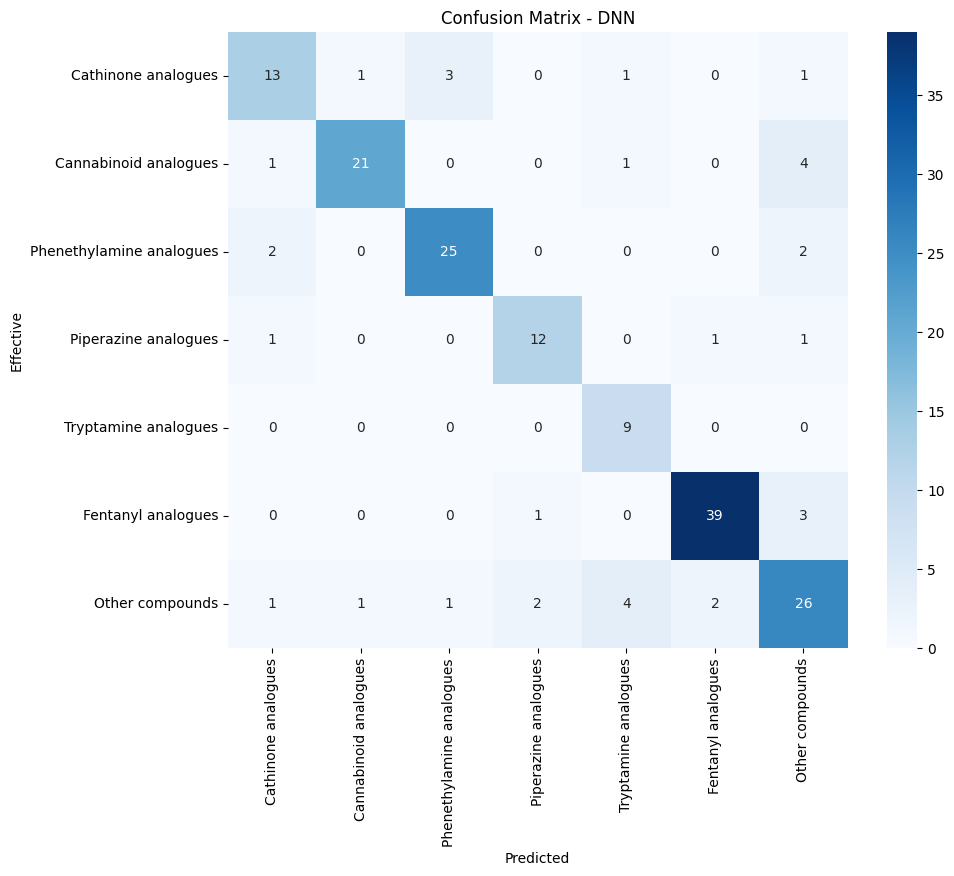

In [87]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred_classes, target_names=class_labels))
print("\n=== Confusion Matrix ===")
confusion_matrix_result = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - DNN')
plt.xlabel('Predicted')
plt.ylabel('Effective')
plt.grid(False)
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


C:\Users\claud\AppData\Local\Temp\ipykernel_2444\1078565117.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


<Figure size 800x600 with 0 Axes>

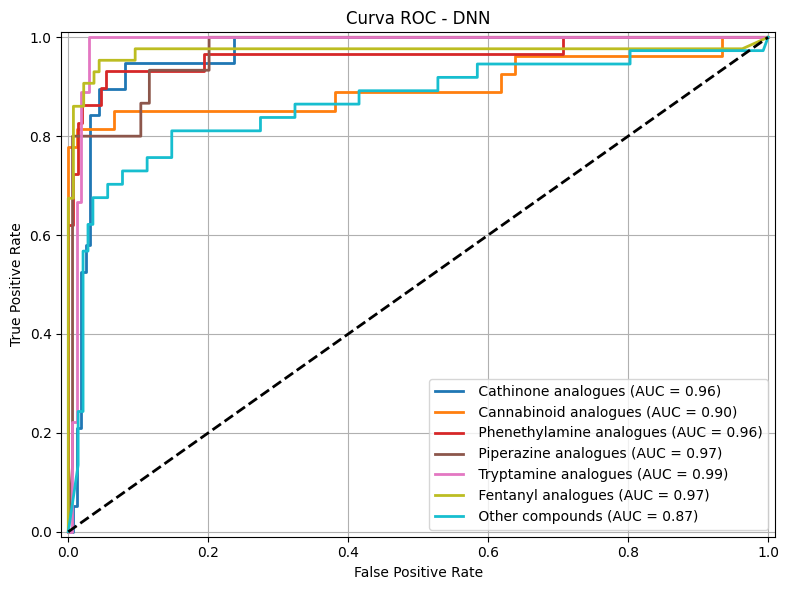

In [88]:
# curva auc roc
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# === Binarizza le etichette (necessario per multi-classe) ===
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
# === Plot della curva ROC ===
n_classes = len(classes)
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
                label=f" {class_labels[i]} (AUC = {roc_auc[i]:.2f})")
# Linea di riferimento
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - DNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
# salvare il modello
model.save('model/dnn_spectra_version.keras')